Naive Bayes theorom: 
    
    P(A|B) = (P(B|A) x P(A)) / P(B)

Stated as:
    
       Posterior Prt obablity  = (Likelihood x Prior Prob.) / Marginal Likelihood
       
**Why Naive?**
The naive bayes algorithm has a independence assumption that all the features in the X set are independent of each other. But, there may be a sort of correlation in the variable say salary and the age. It is applied, even if the features are not completely independent, and gives good result.

**P(x)**
It is the likelihood that a randomly selected point from the circle is deemed to be similar to the new datapoint that we are going to be added. Anything, in the circle is deemed to be similar. Thus given the circle, we need to calc the probablity that the new datapoint falls into the circle.





In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)

#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

In [1]:
from sklearn.naive_bayes import GaussianNB
reg = GaussianNB()
model = reg.fit(trainx, trainy)

NameError: name 'trainx' is not defined

In [9]:
from sklearn.metrics import confusion_matrix
predy = model.predict(testx)
cm = confusion_matrix(testy, model.predict(testx))
pd.DataFrame(cm)

,0,1
0,65,3
1,7,25


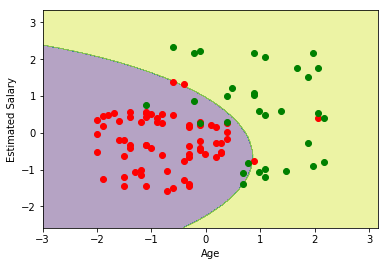

In [10]:
from matplotlib.colors import ListedColormap
x_set = testx
y_set = testy
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01)
                    ,np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))


plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.4)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
x_setd = pd.DataFrame(x_set)
x_p = x_setd.loc[(y_set ==0), :].values
x_n = x_setd.loc[(y_set ==1), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()